In [48]:
 # Import libraries and dependencies
import pandas as pd
from pathlib import Path
import seaborn as sns
import random
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import holoviews as hv
import hvplot.pandas  # noqa

%matplotlib inline

In [2]:
# ***** ~ PRE ~ *****
# Read in the retail and energy portfolio data for 1 year, set the `Date` as the index
#Baker Hughes Pre
pre_bkr_data = Path("Resources/energy_google_finance_preCOVID_BKR.csv")
pre_bkr = pd.read_csv(pre_bkr_data, index_col="Date")


In [3]:
#Devon Energy Pre
pre_dvn_data = Path("Resources/energy_google_finance_preCOVID_DVN.csv")
pre_dvn = pd.read_csv(pre_dvn_data, index_col="Date")


In [4]:
#Schlumberger NV Pre
pre_slb_data = Path("Resources/energy_google_finance_preCOVID_SLB.csv")
pre_slb = pd.read_csv(pre_slb_data, index_col="Date")


In [5]:
#Valero Pre
pre_vlo_data = Path("Resources/energy_google_finance_preCOVID_VLO.csv")
pre_vlo = pd.read_csv(pre_vlo_data, index_col="Date")


In [6]:
#LBrands Pre
pre_lb_data = Path("Resources/retail_google_finance_preCOVID_LB.csv")
pre_lb = pd.read_csv(pre_lb_data, index_col="Date")


In [7]:
#LVMH Pre
pre_lvmuy_data = Path("Resources/retail_google_finance_preCOVID_LVMUY.csv")
pre_lvmuy = pd.read_csv(pre_lvmuy_data, index_col="Date")


In [8]:
#Target Pre
pre_tgt_data = Path("Resources/retail_google_finance_preCOVID_TGT.csv")
pre_tgt = pd.read_csv(pre_tgt_data, index_col="Date")


In [9]:
# Ulta Beauty Pre
pre_ulta_data = Path("Resources/retail_google_finance_preCOVID_ulta.csv")
pre_ulta = pd.read_csv(pre_ulta_data, index_col="Date")


In [10]:
# ***** ~ POST ~ *****
# Read in the retail and energy portfolio data for for **post COVID** world, set the `Date` as the index
#Baker Hughes Post
post_bkr_data = Path("Resources/energy_google_finance_postCOVID_BKR.csv")
post_bkr = pd.read_csv(post_bkr_data, index_col="Date")


In [11]:
#Devon Energy Post
post_dvn_data = Path("Resources/energy_google_finance_postCOVID_DVN.csv")
post_dvn = pd.read_csv(post_dvn_data, index_col="Date")


In [12]:
#Schlumberger NV Post
post_slb_data = Path("Resources/energy_google_finance_postCOVID_SLB.csv")
post_slb = pd.read_csv(post_slb_data, index_col="Date")


In [13]:
# Valero Post
post_vlo_data = Path("Resources/energy_google_finance_postCOVID_VLO.csv")
post_vlo = pd.read_csv(post_vlo_data, index_col="Date")


In [14]:
# L Brands Post
post_lb_data = Path("Resources/retail_google_finance_postCOVID_LB.csv")
post_lb = pd.read_csv(post_lb_data, index_col="Date")


In [15]:
# LVMH Post
post_lvmuy_data = Path("Resources/retail_google_finance_postCOVID_LVMUY.csv")
post_lvmuy = pd.read_csv(post_lvmuy_data, index_col="Date")


In [16]:
# Target Post
post_tgt_data = Path("Resources/retail_google_finance_postCOVID_TGT.csv")
post_tgt = pd.read_csv(post_tgt_data, index_col="Date")


In [17]:
#Ulta
post_ulta_data = Path("Resources/retail_google_finance_postCOVID_ULTA.csv")
post_ulta = pd.read_csv(post_ulta_data, index_col="Date")


In [18]:
# RETAIL PORTFOLIO PRE-COVID

In [19]:
# Combine the Retail DataFrames
# Use the `concat` function to combine the DataFrames by matching indexes (or in this case `Date`)
retail_pre_df = pd.concat([pre_lb, pre_lvmuy, pre_tgt, pre_ulta], axis="columns", sort=False)

# Set column names
retail_pre_df.columns = ['L Brands', 'LVMH', 'Target', 'Ulta']
retail_pre_df.head()

,L Brands,LVMH,Target,Ulta
Date,,,,
3/10/2017 16:00:00,50.30,41.94,55.36,286.42
3/13/2017 16:00:00,49.85,42.29,55.19,286.91
3/14/2017 16:00:00,50.14,42.08,54.75,285.38
3/15/2017 16:00:00,50.68,42.53,54.57,287.78
3/16/2017 16:00:00,49.97,42.77,54.59,286.32


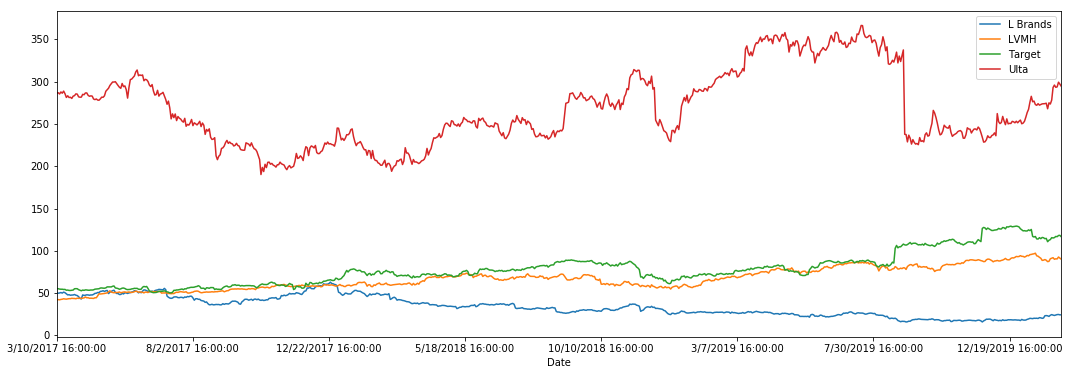

In [20]:
# Plot the data trends of the three variables over time
retail_pre_df.plot(figsize=(18,6))

In [21]:
retail_daily_returns=retail_pre_df.pct_change().dropna()
retail_daily_returns.head()

,L Brands,LVMH,Target,Ulta
Date,,,,
3/13/2017 16:00:00,-0.008946,0.008345,-0.003071,0.001711
3/14/2017 16:00:00,0.005817,-0.004966,-0.007972,-0.005333
3/15/2017 16:00:00,0.010770,0.010694,-0.003288,0.008410
3/16/2017 16:00:00,-0.014009,0.005643,0.000367,-0.005073
3/17/2017 16:00:00,0.024215,0.012158,-0.005496,0.008697


In [22]:
retail_daily_volatility = retail_daily_returns.std()
retail_daily_volatility

L Brands    0.028645
LVMH        0.015197
Target      0.018992
Ulta        0.022575
dtype: float64

In [23]:
lbrands_volatility= retail_daily_volatility['L Brands']
lvmh_volatility= retail_daily_volatility['LVMH']
target_volatility= retail_daily_volatility['Target']
ulta_volatility= retail_daily_volatility['Ulta']

In [24]:
lbrands_last_price=retail_pre_df['L Brands'][-1]
lvmh_last_price=retail_pre_df['LVMH'][-1]
target_last_price=retail_pre_df['Target'][-1]
ulta_last_price=retail_pre_df['Ulta'][-1]

In [25]:
# Set number of trading days and get the retail date from the DataFrame
number_simulations = 100
number_records = 107
retail_monte_carlo = pd.DataFrame()
np.random.seed(50)

In [26]:
for retail in range(number_simulations):
    print(f"Returning Simulation {retail+1}/100...")

    lbrands = [lbrands_last_price]
    lvmh = [lvmh_last_price]
    target = [target_last_price]
    ulta = [ulta_last_price]

    # Simulate the returns for 107 trading days
    for i in range(number_records):
        lbrands.append(lbrands[-1] * (1 + np.random.normal(retail_daily_returns.mean()['L Brands'], lbrands_volatility)))
        lvmh.append(lvmh[-1] * (1 + np.random.normal(retail_daily_returns.mean()['LVMH'], lvmh_volatility)))
        target.append(target[-1] * (1 + np.random.normal(retail_daily_returns.mean()['Target'], target_volatility)))
        ulta.append(ulta[-1] * (1 + np.random.normal(retail_daily_returns.mean()['Ulta'], ulta_volatility)))
    
    # Create a DataFrame of the simulated prices
    retail_portfolio = pd.DataFrame({"L Brands Simulated Prices": lbrands, "LVMH Simulated Prices": lvmh,
                               "Target Simulated Prices": target, "Ulta Simulated Prices": ulta})

    retail_portfolio_returns=retail_portfolio.pct_change()
    
    lbrands_weight = 0.25
    lvmh_weight = 0.25
    target_weight = 0.25
    ulta_weight = 0.25

    retail_portfolio_returns = lbrands_weight * retail_portfolio_returns["L Brands Simulated Prices"]+ lvmh_weight * retail_portfolio_returns["LVMH Simulated Prices"] + target_weight * retail_portfolio_returns["Target Simulated Prices"]+ ulta_weight * retail_portfolio_returns["Ulta Simulated Prices"]

    retail_monte_carlo[retail] = (1 + retail_portfolio_returns.fillna(0)).cumprod()

retail_monte_carlo.hvplot(legend=None, figsize=(12,6))


Returning Simulation 1/100...
Returning Simulation 2/100...
Returning Simulation 3/100...
Returning Simulation 4/100...
Returning Simulation 5/100...
Returning Simulation 6/100...
Returning Simulation 7/100...
Returning Simulation 8/100...
Returning Simulation 9/100...
Returning Simulation 10/100...
Returning Simulation 11/100...
Returning Simulation 12/100...
Returning Simulation 13/100...
Returning Simulation 14/100...
Returning Simulation 15/100...
Returning Simulation 16/100...
Returning Simulation 17/100...
Returning Simulation 18/100...
Returning Simulation 19/100...
Returning Simulation 20/100...
Returning Simulation 21/100...
Returning Simulation 22/100...
Returning Simulation 23/100...
Returning Simulation 24/100...
Returning Simulation 25/100...
Returning Simulation 26/100...
Returning Simulation 27/100...
Returning Simulation 28/100...
Returning Simulation 29/100...
Returning Simulation 30/100...
Returning Simulation 31/100...
Returning Simulation 32/100...
Returning Simulat

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [27]:
# ENERGY PORTFOLIO PRE-COVID

In [28]:
# Combine the Energy DataFrames
# Use the `concat` function to combine the DataFrames by matching indexes (or in this case `Date`)
energy_pre_df = pd.concat([pre_bkr, pre_dvn, pre_slb, pre_vlo], axis="columns")

# Set column names
energy_pre_df.columns = ['Baker Hughes', 'Devon Energy', 'Schlumberger', 'Valero',]

energy_pre_df.head()

,Baker Hughes,Devon Energy,Schlumberger,Valero
Date,,,,
3/10/2017 16:00:00,56.28,40.26,78.69,66.57
3/13/2017 16:00:00,56.68,40.96,78.59,67.66
3/14/2017 16:00:00,56.47,40.02,78.38,67.44
3/15/2017 16:00:00,57.71,41.12,80.25,68.73
3/16/2017 16:00:00,58.24,40.72,79.65,68.55


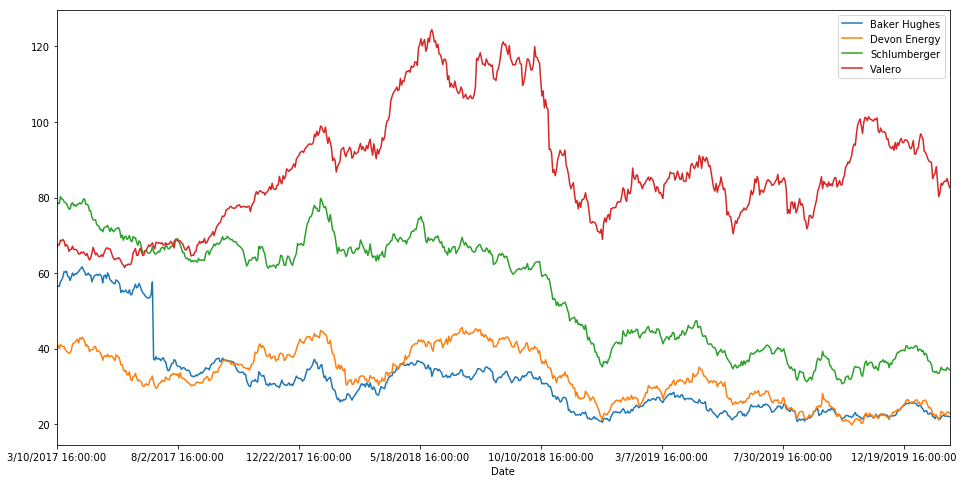

In [29]:
# Plot the data trends of the variables over time
energy_pre_df.plot(figsize=(16,8))

In [30]:
energy_daily_returns=energy_pre_df.pct_change().dropna()
energy_daily_returns.head()

,Baker Hughes,Devon Energy,Schlumberger,Valero
Date,,,,
3/13/2017 16:00:00,0.007107,0.017387,-0.001271,0.016374
3/14/2017 16:00:00,-0.003705,-0.022949,-0.002672,-0.003252
3/15/2017 16:00:00,0.021959,0.027486,0.023858,0.019128
3/16/2017 16:00:00,0.009184,-0.009728,-0.007477,-0.002619
3/17/2017 16:00:00,0.011848,-0.004420,-0.001255,0.005106


In [31]:
energy_daily_volatility = energy_daily_returns.std()
energy_daily_volatility

Baker Hughes    0.023629
Devon Energy    0.024123
Schlumberger    0.017224
Valero          0.016665
dtype: float64

In [32]:
baker_volatility= energy_daily_volatility['Baker Hughes']
devon_volatility= energy_daily_volatility['Devon Energy']
schlumberger_volatility= energy_daily_volatility['Schlumberger']
valero_volatility= energy_daily_volatility['Valero']

In [33]:
baker_last_price=energy_pre_df['Baker Hughes'][-1]
devon_last_price=energy_pre_df['Devon Energy'][-1]
schlumberger_last_price=energy_pre_df['Schlumberger'][-1]
valero_last_price=energy_pre_df['Valero'][-1]

In [34]:
# Set number of trading days and get the energy date from the DataFrame
number_simulations = 100
number_records = 107
energy_monte_carlo = pd.DataFrame()
np.random.seed(50)

In [35]:
for energy in range(number_simulations):
    print(f"Returning Simulation {energy+1}/100...")

    baker = [baker_last_price]
    devon = [devon_last_price]
    schlumberger = [schlumberger_last_price]
    valero = [valero_last_price]

    # Simulate the returns for 107 trading days
    for i in range(number_records):
            baker.append(baker[-1] * (1 + np.random.normal(energy_daily_returns.mean()['Baker Hughes'], baker_volatility)))
            devon.append(devon[-1] * (1 + np.random.normal(energy_daily_returns.mean()['Devon Energy'], devon_volatility)))
            schlumberger.append(schlumberger[-1] * (1 + np.random.normal(energy_daily_returns.mean()['Schlumberger'], schlumberger_volatility)))
            valero.append(valero[-1] * (1 + np.random.normal(energy_daily_returns.mean()['Valero'], valero_volatility)))
    
    # Create a DataFrame of the simulated prices
    energy_portfolio = pd.DataFrame({"Baker Simulated Prices": baker, "Devon Simulated Prices": devon,
                                   "Schlumberger Simulated Prices": schlumberger, "Valero Simulated Prices": valero})

    energy_portfolio_returns=energy_portfolio.pct_change()
    
    baker_weight = 0.25
    devon_weight = 0.25
    schlumberger_weight = 0.25
    valero_weight = 0.25
                      
    energy_portfolio_returns = baker_weight * energy_portfolio_returns["Baker Simulated Prices"]+ devon_weight * energy_portfolio_returns["Devon Simulated Prices"] + schlumberger_weight * energy_portfolio_returns["Schlumberger Simulated Prices"]+ valero_weight * energy_portfolio_returns["Valero Simulated Prices"]
                      
    energy_monte_carlo[energy] = (1 + energy_portfolio_returns.fillna(0)).cumprod()

energy_monte_carlo.hvplot(legend=None, figsize=(12,6))


Returning Simulation 1/100...
Returning Simulation 2/100...
Returning Simulation 3/100...
Returning Simulation 4/100...
Returning Simulation 5/100...
Returning Simulation 6/100...
Returning Simulation 7/100...
Returning Simulation 8/100...
Returning Simulation 9/100...
Returning Simulation 10/100...
Returning Simulation 11/100...
Returning Simulation 12/100...
Returning Simulation 13/100...
Returning Simulation 14/100...
Returning Simulation 15/100...
Returning Simulation 16/100...
Returning Simulation 17/100...
Returning Simulation 18/100...
Returning Simulation 19/100...
Returning Simulation 20/100...
Returning Simulation 21/100...
Returning Simulation 22/100...
Returning Simulation 23/100...
Returning Simulation 24/100...
Returning Simulation 25/100...
Returning Simulation 26/100...
Returning Simulation 27/100...
Returning Simulation 28/100...
Returning Simulation 29/100...
Returning Simulation 30/100...
Returning Simulation 31/100...
Returning Simulation 32/100...
Returning Simulat

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [36]:
# POST COVID PORTFOLIOS

# Read in the retail and energy portfolio data for March-August, set the `Date` as the index

#Post Energy and Retail Portfolios
post_bkr_data = Path("Resources/energy_google_finance_postCOVID_BKR.csv")
post_dvn_data = Path("Resources/energy_google_finance_postCOVID_DVN.csv")
post_slb_data = Path("Resources/energy_google_finance_postCOVID_SLB.csv")
post_vlo_data = Path("Resources/energy_google_finance_postCOVID_VLO.csv")
post_lb_data = Path("Resources/retail_google_finance_postCOVID_LB.csv")
post_lvmh_data = Path("Resources/retail_google_finance_postCOVID_LVMUY.csv")
post_tgt_data = Path("Resources/retail_google_finance_postCOVID_TGT.csv")
post_ulta_data = Path("Resources/retail_google_finance_postCOVID_ULTA.csv")

post_bkr = pd.read_csv(post_bkr_data, index_col="Date")
post_dvn = pd.read_csv(post_dvn_data, index_col="Date")
post_slb = pd.read_csv(post_slb_data, index_col="Date")
post_vlo = pd.read_csv(post_vlo_data, index_col="Date")
post_lb = pd.read_csv(post_lb_data, index_col="Date")
post_lvmh = pd.read_csv(post_lvmh_data, index_col="Date")
post_tgt = pd.read_csv(post_tgt_data, index_col="Date")
post_ulta = pd.read_csv(post_ulta_data, index_col="Date")

In [37]:
# Combine the Post-C RETAIL DataFrames

# Use the `concat` function to combine the DataFrames by matching indexes (or in this case `Date`)
retail_post_df = pd.concat([post_lb, post_lvmh, post_tgt, post_ulta], axis="columns", sort=False)

# Set column names
retail_post_df.columns = ['L Brands', 'LVMH', 'Target', 'Ulta Beauty']

# show it
retail_post_df.head()


,L Brands,LVMH,Target,Ulta Beauty
Date,,,,
3/10/2020 16:00:00,20.77,78.61,108.33,239.06
3/11/2020 16:00:00,19.62,73.66,105.58,221.21
3/12/2020 16:00:00,15.84,66.81,92.62,198.54
3/13/2020 16:00:00,16.12,73.57,101.02,207.06
3/16/2020 16:00:00,11.65,64.25,93.79,161.54


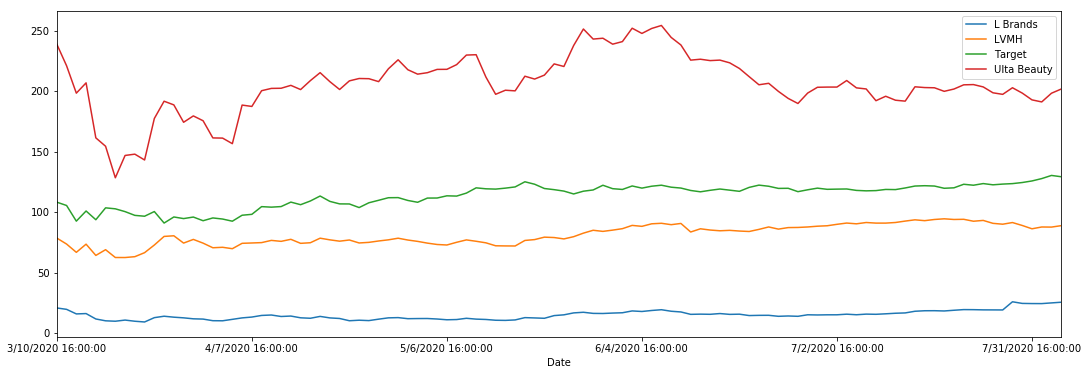

In [38]:
# Plot the data trends of the variables over time
retail_post_df.plot(figsize=(18,6))


In [39]:
# Cumulative returns for Retail Portfolio
retail_portfolio_cumulative_returns = pd.DataFrame

#Set the portfolio weights
retail_weights = [0.2, 0.2, 0.2, 0.2]

#Use the 'dot' function to multiply those weights with the simulated daily returns in the column
retail_portfolio = retail_post_df.dot(retail_weights)

#Calculate the cumulative return series
retail_portfolio_cumulative_returns = (1 + retail_portfolio_returns.fillna(0)).cumprod()

#Print records from the dataframe
retail_portfolio_cumulative_returns.hvplot()

:Curve   [index]   (0)

In [40]:
# Combine the post-C ENERGY DataFrames
# Use the `concat` function to combine the DataFrames by matching indexes (or in this case `Date`)
energy_post_df = pd.concat([post_bkr, post_dvn, post_slb, post_vlo], axis="columns")

# Set column names
energy_post_df.columns = ['Baker Hughes', 'Devon Energy', 'Schlumberger', 'Valero',]

energy_post_df.head()


,Baker Hughes,Devon Energy,Schlumberger,Valero
Date,,,,
3/10/2020 16:00:00,13.76,9.01,18.19,60.45
3/11/2020 16:00:00,12.71,8.41,17.38,54.42
3/12/2020 16:00:00,10.70,7.27,14.42,43.96
3/13/2020 16:00:00,12.73,8.70,16.16,49.90
3/16/2020 16:00:00,11.61,7.57,14.41,41.63


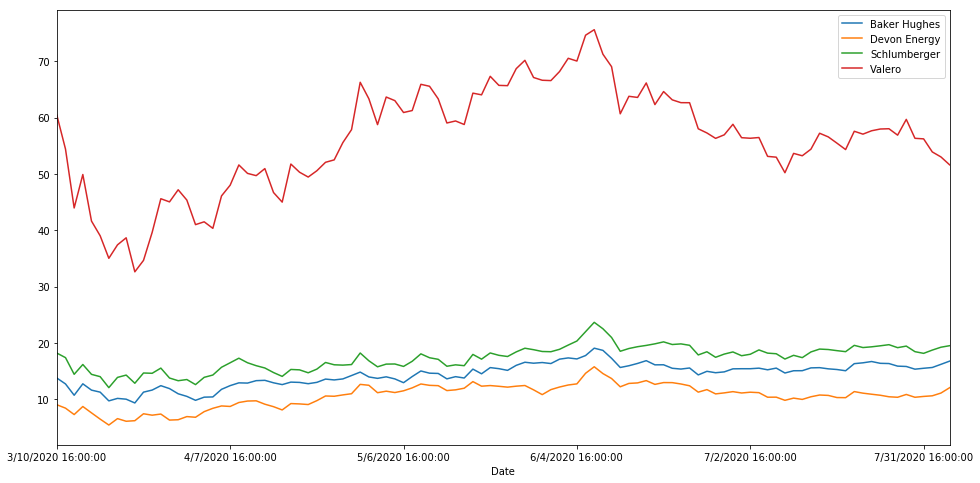

In [41]:
# Plot the data trends of the variables over time
energy_post_df.plot(figsize=(16,8))

In [42]:
# Cumulative returns for Energy Portfolio
energy_portfolio_cumulative_returns = pd.DataFrame

#Set the portfolio weights
energy_weights = [0.2, 0.2, 0.2, 0.2]

#Use the 'dot' function to multiply those weights with the simulated daily returns in the column
energy_portfolio = energy_post_df.dot(retail_weights)

#Calculate the cumulative return series
energy_portfolio_cumulative_returns = (1 + energy_portfolio_returns.fillna(0)).cumprod()

#Print records from the dataframe
energy_portfolio_cumulative_returns.hvplot()

:Curve   [index]   (0)

In [46]:
# Compare the monte carlo simulation side-by-side with the actuals for retail
retail_monte_carlo.hvplot().opts(title="Retail Portfolio Simulations Pre-COVID") + retail_portfolio_cumulative_returns.hvplot().opts(title="Actual Retail Performance in Pandemic")



:Layout
   .NdOverlay.I :NdOverlay   [Variable]
      :Curve   [index]   (value)
   .Curve.A_0   :Curve   [index]   (0)

In [47]:
# Compare the monte carlo simulation side-by-side with the actuals for retail
energy_monte_carlo.hvplot().opts(title="Energy Portfolio Simulations Pre-COVID") + energy_portfolio_cumulative_returns.hvplot().opts(title="Actual Energy Performance in Pandemic")


:Layout
   .NdOverlay.I :NdOverlay   [Variable]
      :Curve   [index]   (value)
   .Curve.A_0   :Curve   [index]   (0)

In [ ]:
# Recommend the ideal, pandemic proof portfolio